## Hand Written Digit Prediction - Classification Analysis

The digits dataset consists of 8x8 pixel images of digits. The image attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each iamge represents.

## Import Library

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Import Data

In [2]:
from sklearn.datasets import load_digits

In [3]:
df = load_digits()

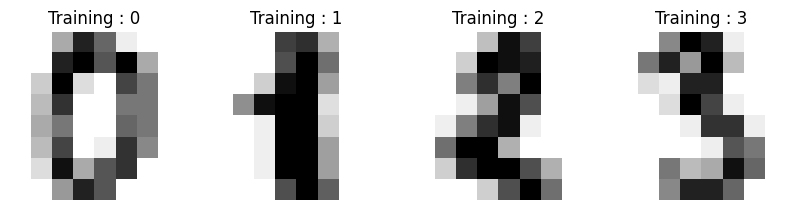

In [4]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax,image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training : %i" % label)

## Data Preprocessing

In [5]:
df.images.shape

(1797, 8, 8)

In [6]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [7]:
df.images[0].shape

(8, 8)

In [8]:
len(df.images)

1797

In [9]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [10]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [11]:
data[0].shape

(64,)

In [12]:
data.shape

(1797, 64)

## Scaling Image Data

In [14]:
data.max()

16.0

In [15]:
data.min()

0.0

In [16]:
data = data/16

In [17]:
data.max()

1.0

In [18]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## Train Test Split Data

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.25)

In [20]:
X_train.shape, X_test.shape

((1347, 64), (450, 64))

## Random Forest Model

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf = RandomForestClassifier()

In [23]:
rf.fit(X_train, y_train)

RandomForestClassifier()

## Predic Test Data

In [24]:
y_pred = rf.predict(X_test)

In [25]:
y_pred

array([9, 0, 4, 8, 5, 0, 4, 9, 7, 9, 0, 4, 1, 6, 8, 6, 0, 2, 9, 4, 8, 4,
       2, 7, 0, 6, 0, 5, 1, 6, 9, 7, 7, 4, 0, 5, 6, 6, 1, 3, 4, 9, 8, 3,
       0, 8, 2, 4, 8, 6, 6, 6, 1, 6, 4, 6, 0, 6, 3, 6, 7, 5, 6, 0, 5, 8,
       8, 2, 1, 6, 4, 1, 4, 7, 2, 9, 9, 1, 2, 4, 0, 7, 9, 4, 0, 1, 2, 8,
       1, 5, 1, 3, 3, 5, 6, 5, 3, 1, 2, 4, 1, 5, 7, 4, 6, 3, 6, 5, 8, 7,
       7, 2, 8, 6, 7, 8, 2, 1, 7, 3, 0, 4, 0, 3, 3, 5, 7, 0, 8, 9, 6, 6,
       9, 2, 1, 7, 5, 7, 0, 9, 1, 2, 5, 2, 5, 1, 1, 5, 8, 9, 7, 8, 2, 4,
       7, 5, 3, 8, 0, 5, 7, 8, 1, 4, 3, 5, 4, 6, 7, 3, 5, 2, 2, 7, 3, 3,
       8, 7, 6, 4, 1, 8, 1, 6, 4, 2, 6, 9, 0, 0, 7, 2, 7, 6, 6, 4, 0, 7,
       6, 2, 5, 5, 3, 5, 8, 3, 5, 4, 1, 1, 9, 8, 6, 3, 6, 1, 9, 6, 8, 7,
       7, 4, 8, 7, 8, 7, 7, 5, 4, 5, 0, 1, 7, 5, 2, 6, 3, 1, 9, 8, 7, 7,
       9, 5, 5, 8, 3, 3, 7, 2, 6, 2, 2, 4, 0, 4, 2, 6, 2, 8, 2, 9, 4, 2,
       9, 6, 1, 6, 4, 3, 4, 4, 6, 4, 2, 1, 7, 8, 4, 2, 1, 6, 2, 1, 6, 0,
       8, 6, 8, 7, 3, 3, 5, 7, 3, 2, 4, 5, 8, 7, 0,

## Model Accuracy

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
confusion_matrix(y_test, y_pred)

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 48,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0, 55,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 51,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  0, 41,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 39]], dtype=int64)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       0.97      1.00      0.99        38
           2       0.98      0.98      0.98        49
           3       0.98      0.96      0.97        46
           4       0.98      0.98      0.98        50
           5       1.00      1.00      1.00        39
           6       1.00      0.98      0.99        56
           7       0.98      1.00      0.99        51
           8       0.95      0.95      0.95        43
           9       1.00      0.97      0.99        40

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

